# **IND320 Project Log: Weather Data Analysis**
**Esteban Carrasco**
*September 26, 2025*

---

## **1. Project Overview**
This project aimed to analyze hourly meteorological data (temperature, precipitation, wind speed/direction) from January 2020 using **Python (Pandas, Matplotlib)** and deploy an interactive dashboard with **Streamlit**. The dataset, provided in CSV format, required preprocessing for temporal analysis and multi-scale visualization due to divergent units (°C, mm, m/s).

Key objectives:
- **Data Exploration**: Understand patterns in weather variables.
- **Visualization**: Create clear, scalable plots for variables with different magnitudes.
- **Interactivity**: Build a Streamlit app with dynamic filters (month/column selection).
- **Documentation**: Maintain reproducible code with comments and a development log.

---

## **2. Development Process**

### **LOG**

### **AI**

### **Jupyter Notebook Phase**


In [6]:
!pip install pandas matplotlib seaborn

In [34]:
!pip install windrose

In [10]:
%cd ..

c:\Users\esteb\Documents\NMBU\IND320\ProjectWork1\IND320-ProjectWork1


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes


csv loading

In [13]:
df = pd.read_csv("Data/open-meteo-subset.csv")

convert 'time' into datetime for the plot

In [14]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)  # put 'time' as index

Aperçu

In [15]:
print("Premières lignes :")
display(df.head())
print("\nStatistiques :")
display(df.describe())

Premières lignes :


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284



Statistiques :


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


#### Individual plot

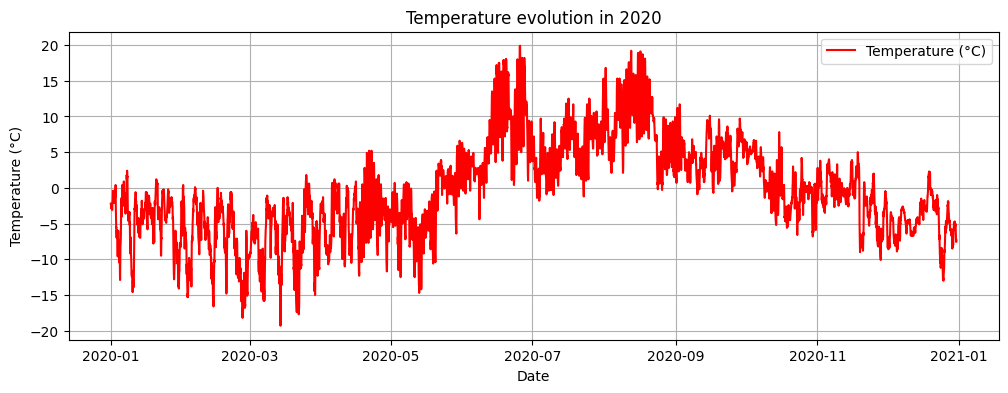

In [25]:
# Temperature plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['temperature_2m (°C)'], color='red', label='Temperature (°C)')
plt.title("Temperature evolution in 2020")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


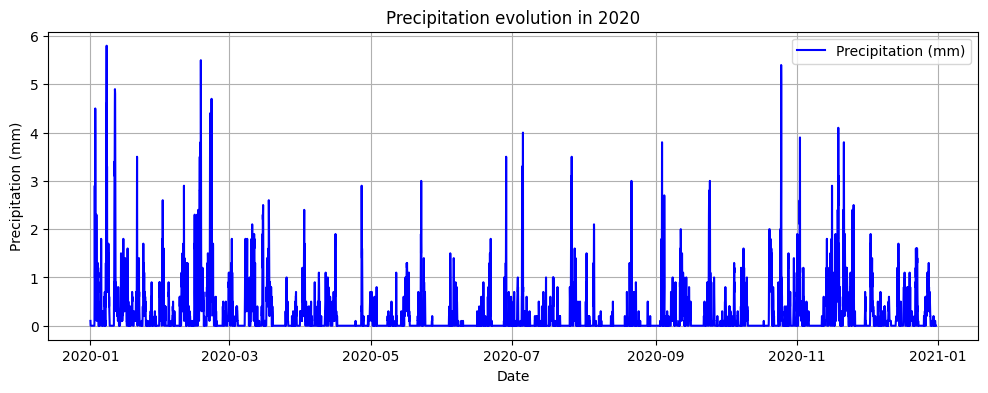

In [26]:
# Precipitation plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['precipitation (mm)'], color='blue', label='Precipitation (mm)')
plt.title("Precipitation evolution in 2020")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.legend()
plt.show()

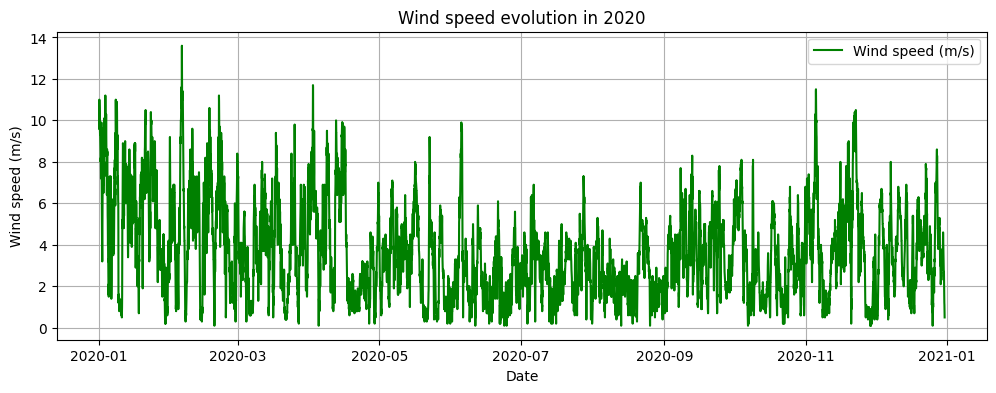

In [29]:
# Wind speed plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['wind_speed_10m (m/s)'], color='green', label='Wind speed (m/s)')
plt.title("Wind speed evolution in 2020")
plt.xlabel("Date")
plt.ylabel("Wind speed (m/s)")
plt.grid(True)
plt.legend()
plt.show()

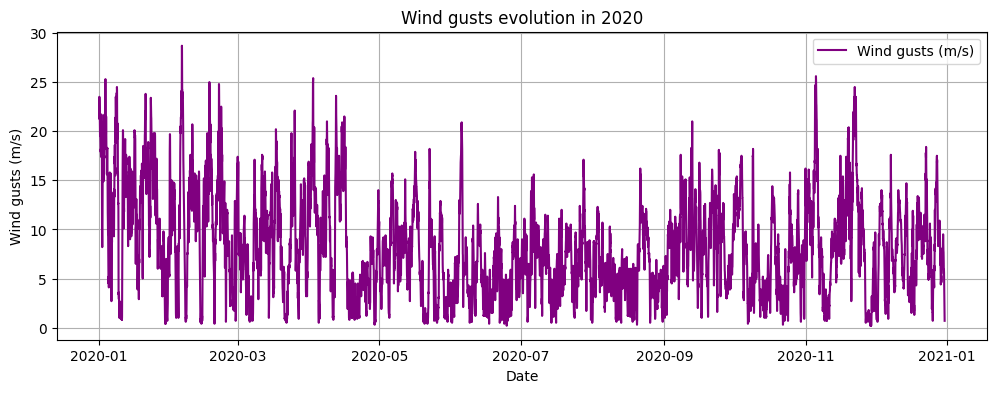

In [30]:
# Wind gusts plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['wind_gusts_10m (m/s)'], color='purple', label='Wind gusts (m/s)')
plt.title("Wind gusts evolution in 2020")
plt.xlabel("Date")
plt.ylabel("Wind gusts (m/s)")
plt.grid(True)
plt.legend()
plt.show()

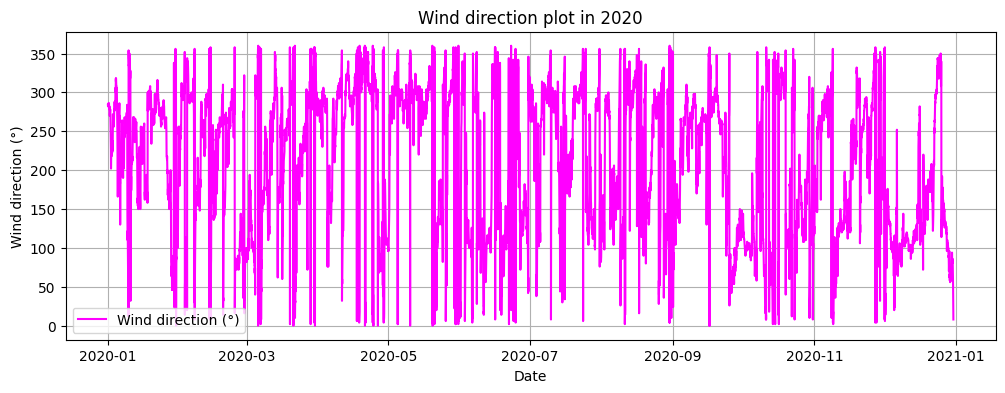

In [31]:
# Wind direction plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['wind_direction_10m (°)'], color='magenta', label='Wind direction (°)')
plt.title("Wind direction plot in 2020")
plt.xlabel("Date")
plt.ylabel("Wind direction (°)")
plt.grid(True)
plt.legend()
plt.show()

### Group plot

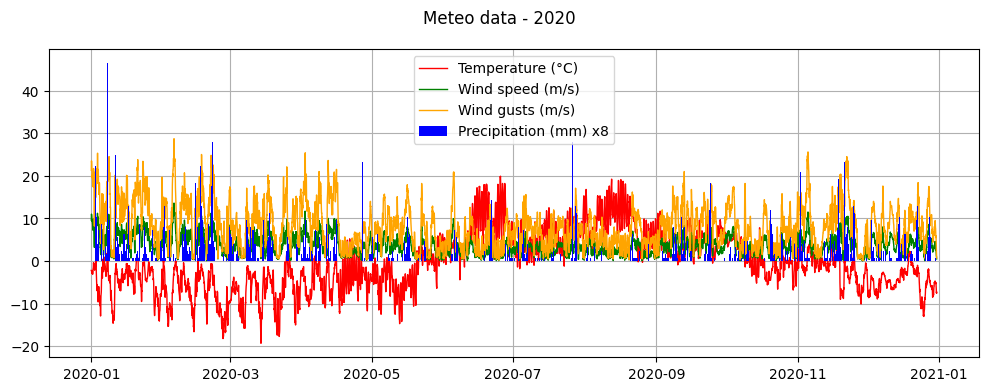

In [46]:
plt.figure(figsize=(12, 4))

# Temperatures
plt.plot(df.index, df['temperature_2m (°C)'], color='red', label='Temperature (°C)', linewidth=1, zorder=2)

# Wind speed and gusts
plt.plot(df.index, df['wind_speed_10m (m/s)'], color='green', label='Wind speed (m/s)', linewidth=1, zorder=2)
plt.plot(df.index, df['wind_gusts_10m (m/s)'], color='orange', label='Wind gusts (m/s)', linewidth=1, zorder=2)

# Precipitations (bars brought to the foreground)
plt.bar(df.index, df['precipitation (mm)'] * 8, color='blue', width=0.05, label='Precipitation (mm) x8', zorder=3)

plt.suptitle("Meteo data - 2020")
plt.legend()
plt.grid(True, zorder=1)  # Ensure the grid is in the background
plt.show()

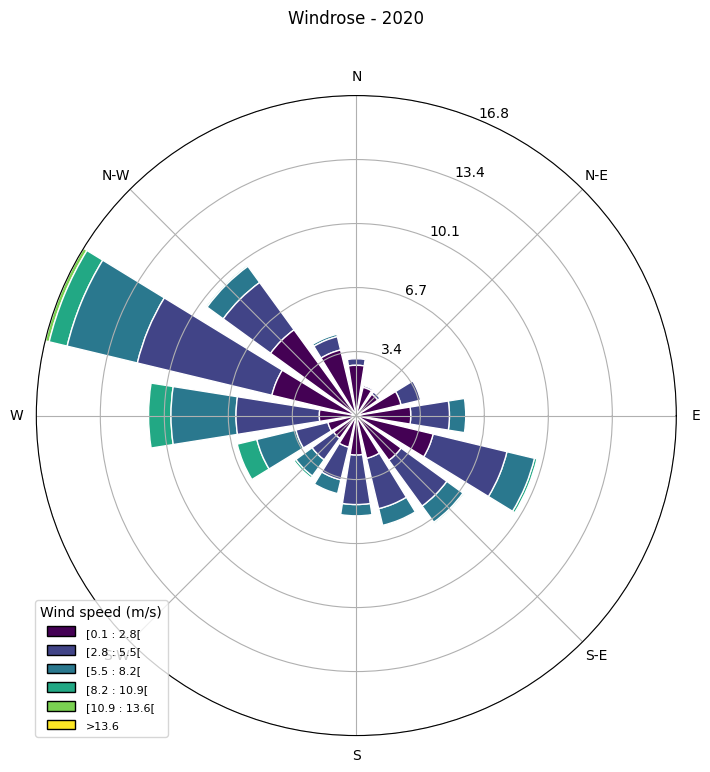

In [37]:
# Colones extraction
wind_dir = df['wind_direction_10m (°)']  # Directions en degrés (0-360)
wind_speed = df['wind_speed_10m (m/s)']  # Vitesse en m/s

# Windrose plot
fig = plt.figure(figsize=(10, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(wind_dir, wind_speed, normed=True, opening=0.8, edgecolor='white')

# Personnalisation
ax.set_legend(title="Wind speed (m/s)")
plt.title("Windrose - 2020", y=1.1)
plt.show()
